# Exploratory Data Analysis 
<b>Process : </b>
* Load the datasets and set index if applicable.
* Inspect the head of dataset,check if data is tidy, shape of dataset, datatypes, missing values,unique counts and build a data dictionary.
* Run the descriptive statistics of the objects and numerical datatypes and then transform datatypes accordingly.
* Carryout univariate, bivariate and multivariate analysis using graphical and non-graphical means.
* Feature Engineering : Extract and create new features.
* Preprocessing and prepare data for statistical modelling.
* Statistical modelling

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv('titanic_train.csv')
df = df.set_index('passenger_id')

In [6]:
df.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
passenger_id,,,,,,,,,,,,,,
1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


<b> Step 1 : Inspecting the dataset</b>
* Inspect the head of dataset,check if data is tidy, shape of dataset, datatypes, missing values,unique counts and build a data dictionary.
* To check if data is tidy :<br>
1- Is every column a variable? <br>
2- Is every row an observation? <br>
3- Is every table a single observational unit? 

In [7]:
df.shape

(850, 14)

In [14]:
datadict = pd.DataFrame(df.dtypes)
datadict['Missing_Values'] = df.isnull().sum()
datadict['NUnique'] = df.nunique()
datadict['Count'] = df.count()
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,Missing_Values,NUnique,Count
pclass,int64,0,3,850
name,object,0,849,850
sex,object,0,2,850
age,float64,174,88,676
sibsp,int64,0,7,850
parch,int64,0,8,850
ticket,object,0,660,850
fare,float64,1,236,849
cabin,object,659,135,191
embarked,object,1,3,849


<b> Step 2 : Descriptive Statistics</b>
* Run the descriptive statistics of the objects and numerical datatypes and then transform datatypes accordingly.

In [15]:
df.describe(include=['object'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,850,850,850,191,849,308,464
unique,849,2,660,135,3,26,272
top,"Kelly, Mr. James",male,CA. 2343,G6,S,4,"New York, NY"
freq,2,551,10,4,589,25,36


In [16]:
df.describe(include=['number'])

,pclass,age,sibsp,parch,fare,body,survived
count,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


<b> Step 4 : Carryout univariate, bivariate and multivariate analysis using graphical and non-graphical means.

In [19]:
df.survived.value_counts(normalize=True)

0    0.631765
1    0.368235
Name: survived, dtype: float64

In [20]:
df[['sex','survived']].value_counts().to_frame()

,,0
sex,survived,
male,0,448
female,1,210
male,1,103
female,0,89


We can see 36% people survived and 64% of people did not survive. More percentage of females survived than males.

<b> Univariate Analysis<br> </b>
* This type of data consists of only one variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it.

C:\Users\adore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adore\anaconda3\lib\si

<AxesSubplot:xlabel='age', ylabel='Density'>

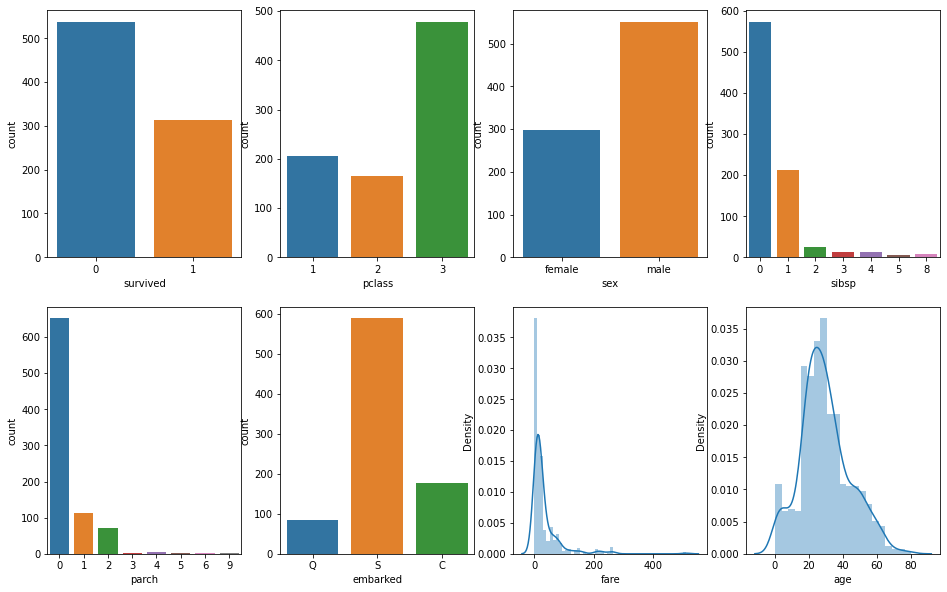

In [25]:
fig, axes = plt.subplots(2,4, figsize=(16,10))
sns.countplot('survived', data=df, ax= axes[0,0])
sns.countplot('pclass', data=df, ax= axes[0,1])
sns.countplot('sex', data=df, ax= axes[0,2])
sns.countplot('sibsp', data=df, ax= axes[0,3])
sns.countplot('parch', data=df, ax= axes[1,0])
sns.countplot('embarked', data=df, ax= axes[1,1])
sns.distplot(df.fare, ax= axes[1,2],kde=True)
sns.distplot(df.age.dropna(), ax= axes[1,3],kde=True)

<b> Bivariate EDA </b>
* This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables.

<AxesSubplot:xlabel='survived', ylabel='fare'>

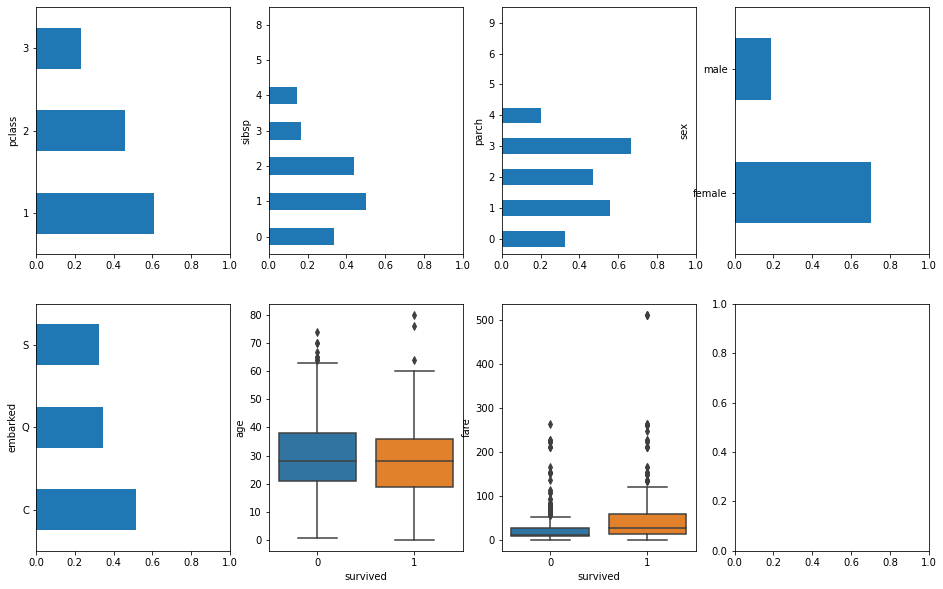

In [30]:
figbi, axesbi = plt.subplots(2,4, figsize=(16,10))
df.groupby('pclass')['survived'].mean().plot(kind='barh', ax=axesbi[0,0], xlim=[0,1])
df.groupby('sibsp')['survived'].mean().plot(kind='barh', ax=axesbi[0,1], xlim=[0,1])
df.groupby('parch')['survived'].mean().plot(kind='barh', ax=axesbi[0,2], xlim=[0,1])
df.groupby('sex')['survived'].mean().plot(kind='barh', ax=axesbi[0,3], xlim=[0,1])
df.groupby('embarked')['survived'].mean().plot(kind='barh', ax=axesbi[1,0], xlim=[0,1])
sns.boxplot(x="survived", y="age", data=df,ax=axesbi[1,1])
sns.boxplot(x="survived", y="fare", data=df,ax=axesbi[1,2] )

* Male survival rate is around 20% and female survival rate is around 50%
* Passengers in class 1 had better chances than in class 3
* Only marginal relationship between fare and survival rate

Joint plots (continuous vs continuous)

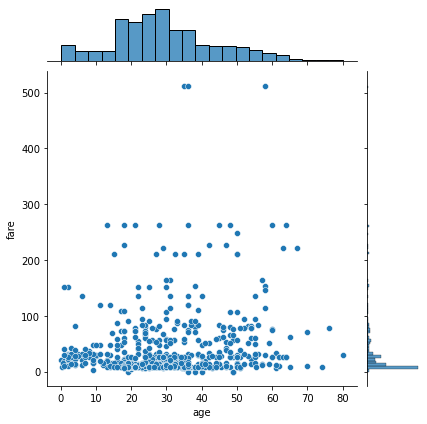

In [31]:
sns.jointplot(x="age" , y="fare", data=df)

<b> Multivariate EDA </b>
* When the data involves three or more variables, it is categorized under multivariate.

* Construct a corelation matrix of int and float feature types

C:\Users\adore\AppData\Local\Temp/ipykernel_16092/3914966837.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)


<AxesSubplot:>

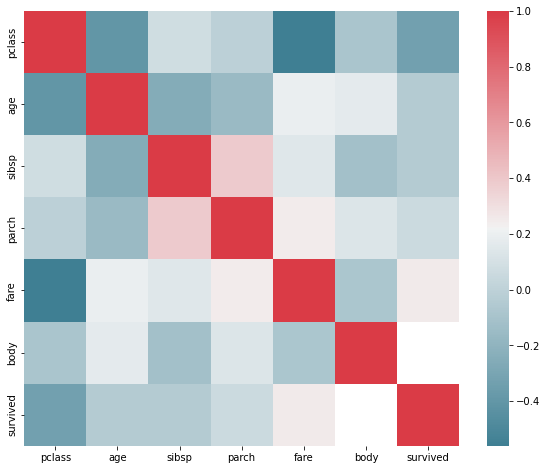

In [38]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

* Positive corelation between fare and survived
* Negative corelation between fare and class

# Feature Engineering
* Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the machine learning model. It can be thought of as the art of selecting the important features and transforming them into refined and meaningful features that suit the needs of the model.

In [39]:
df['title'] = df.name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
df.title.value_counts().reset_index()

,index,title
0,Mr.,488
1,Miss.,171
2,Mrs.,123
3,Master.,46
4,Dr.,6
5,Rev.,4
6,Col.,3
7,Major.,2
8,Ms.,1
9,Mme.,1
